# Домашняя работа 6. Классификация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #6: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 4.12.2017 01:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 9.12.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [ODS - классификация](https://habrahabr.ru/company/ods/blog/322534/)
- [Коллаборативная фильтрация - рекомендательная система](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D0%BB%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%B8%D0%B2%D0%BD%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F)
- [Метрики расстояний - косинусная, минковского, проклятье размерности ](http://www.machinelearning.ru/wiki/images/9/9a/Sem1_knn.pdf)
- [Offtop: метрики качества рекомендаьельных систем](https://habrahabr.ru/company/dca/blog/281066/)
- [Байесовский классификатор](http://www.machinelearning.ru/wiki/index.php?title=%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80)
- [Интересная статья про спам/не спам](https://habrahabr.ru/post/252265/)

Если вам понравилась задача распознавания текстов, то вот подборочка:

- [библиотека Gensim](https://radimrehurek.com/gensim/)
- [библиотека nltk](http://www.nltk.org/)
- [Лекция про word2vec 🔥](https://www.youtube.com/watch?v=oBb9aFmp0Hs)
- [Лекция Векторные представления слов и документов 🔥](https://www.youtube.com/watch?v=hiDBnEyoZS4)

В этой практике мы будем использовать алгоритмы k ближайших соседей и наивный байес для задач классификации и не только. 

## kNN - ближайшие соседи

Мы уже видели с вами на практиках и лекциях как применять алгоритм ближайших соседей. Мы даже видели с вами на примере классификации sms-спама, что этот метрический алгоритм не всегда справляется с многомерными данными. Поэтому в домашнем задании мы с вами сконцентриуемся на другой задаче, котоую можно решить этим алгоритмом: вы построите рекомендательную систему.

### Рекомендательная система

Будем использовать известный нам [датасет с оценками фильмов](http://www.cs.umn.edu/GroupLens). Только в этот раз мы не будем кластеризовывать жанры, а будем рекомендовать похожие фильмы, основываясь на оценках других пользователей. То есть мы будем по факту предсказывать предпочтение нового пользователя на основе других.

Для рекомендательной системы в датасете в объектами будут пользователи, а признаками - оценки фильма данным пользователем.

![](https://i.imgur.com/hn3xjZl.png)

Мы будем использовать метрический алгоритм для поиска ближайших соседей, тем самым рекомендовать фильмы близкие к данному.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv('./../data/imdb_movies.csv.gz', index_col='movieId')
ratings = pd.read_csv('./../data/imdb_ratings.csv.gz')

print(movies.shape)
print(ratings.shape)

(9125, 2)
(100004, 4)


In [3]:
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### 1.1 Поиск популярных фильмов (3 балла)

Среди всех фильмов есть не популярные, для которых выставлена 1-2 оценки. Такого количества данных не достаточно, поэтому нужно срезать много фильмов с маленьким числом отзывов.

Посчтитайте количество оценок для каждого фильма.

In [5]:
ratings[ratings.movieId == 356].shape

(341, 4)

In [6]:
ratings.movieId.value_counts()

356       341
296       324
318       311
593       304
260       291
480       274
2571      259
1         247
527       244
589       237
1196      234
110       228
1270      226
608       224
2858      220
1198      220
780       218
1210      217
588       215
457       213
2959      202
590       202
50        201
47        201
4993      200
858       200
150       200
364       200
380       198
32        196
         ... 
98160       1
6109        1
120805      1
131168      1
73860       1
60674       1
104595      1
133281      1
155820      1
26797       1
47287       1
8420        1
61250       1
3870        1
5917        1
1759        1
26323       1
32464       1
65216       1
65088       1
73276       1
7708        1
69118       1
110058      1
140763      1
48520       1
111913      1
1311        1
27922       1
2049        1
Name: movieId, Length: 9066, dtype: int64

Выведите сводную статистику по количеству оценок фильмов. (общее число фильмов, среднее количество оценок, дисперсию, квантили)

In [7]:
ratings.movieId.value_counts().describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: movieId, dtype: float64

Как мы видим `75%` квантиль показывет, что `75%` фильмов имело очень мало оценок. Нам столько будет недостаточно. Посчтитайте квантили в диапазоне от `75%` до `100%` с шагом в `1%`. Выберите тот квантиль, при котором количество оценок равно 20. Напишите какой это квантиль. Напишите сколько всего фильмов останется, если отбросить все фильмы у которых рейтинг меньше этого квантиля.

In [8]:
print(ratings.movieId.value_counts().describe(percentiles=[i / 100 for i in range(75, 101)]))

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
50%         3.000000
75%         9.000000
76%        10.000000
77%        10.000000
78%        11.000000
79%        12.000000
80%        13.000000
81%        14.000000
82%        15.000000
83%        16.000000
84%        17.000000
85%        19.000000
86%        20.000000
87%        22.000000
88%        23.000000
89%        25.000000
90%        28.000000
91%        31.000000
92%        34.000000
93%        38.000000
94%        44.000000
95%        49.000000
96%        58.000000
97%        69.050000
98%        89.000000
99%       123.000000
100%      341.000000
max       341.000000
Name: movieId, dtype: float64


Ответ: 86% квантиль

In [9]:
percentiles=[.86]#i / 100 for i in range(75, 101)]

for perc in percentiles:
    print(sum(ratings.movieId.value_counts() >= ratings.movieId.value_counts().quantile(.86)))

1303


### 1.2 Соединяем таблицы (1 балл)

Будет немного не удобно искать фильмы по их идентификаторам, нам нужны названия. Поэтому соедините две таблицы `ratings` и `movies` по `movieId` и отфильтруйте отзывы на редкие фильмы, которые мы нашли в предыдущем шаге. Выведите первые 5 элементов полученного датасета.

In [10]:
df = ratings.copy()

In [11]:
df = df.loc[((ratings.movieId.value_counts() >= ratings.movieId.value_counts().quantile(.86)) == True).index]

In [12]:
dff = ratings.copy()

In [13]:
dfff = df.copy()

In [14]:
df = df.join(movies, on='movieId')

In [15]:
df.head()

,userId,movieId,rating,timestamp,title,genres
356,5.0,231,3.5,1.163374e+09,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
296,4.0,2263,3.0,9.498963e+08,"Seventh Sign, The (1988)",Drama|Fantasy|Thriller
318,4.0,2791,5.0,9.498115e+08,Airplane! (1980),Comedy
593,8.0,457,4.5,1.154400e+09,"Fugitive, The (1993)",Thriller
260,4.0,2005,5.0,9.498961e+08,"Goonies, The (1985)",Action|Adventure|Children|Comedy|Fantasy


### 1.3 Матрица Фильмы-Пользователи

В нашем случае мы будем искать похожие фильмы, поэтому сделайте из датасета оценок матрицу, где в строках фильмы, в колонках пользователи, а в ячейках оценки. Пропущенные значение, то есть отсутсвие оценки, заполните 0.

Для увеличения скорости выполнения алгоритма ближайших соседей примените функцию [`scipy.sparse.csc_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html),  которая создаст плотное представление нашей разреженой матрицы.

In [16]:
import scipy as sp
from scipy.sparse import csc_matrix

In [17]:
matr = df.pivot_table('rating', index='movieId', columns='userId').fillna(0)

In [18]:
matr_fit = csc_matrix(matr.as_matrix())

### 1.4 Тренировка модели рекомендаций 

Так как по сути у нас нет каких-то меток классов, мы будем использовать алгоритма без учителя [`sklearn.neighbors.NearestNeighbors`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html). Научите его по данным нашей матрицы пользователей-фильмов и напишите **функцию**, принимающую на вход название фильма и возвращающую список из 6 рекомендованых фильмов, начиная от более похожего.

Для определения "похожести" двух фильмов мы будем использовать косинусную меру, вместо евклидова или минковского:

$$\LARGE cos(\overrightarrow{x},\overrightarrow{y}) = \frac{\overrightarrow{x} \cdot \overrightarrow{y}}{||\overrightarrow{x}|| \times ||\overrightarrow{y}||}$$

In [19]:
from sklearn.neighbors import NearestNeighbors as NN

In [20]:
model = NN(n_neighbors=10, n_jobs=3, algorithm='brute', metric='cosine')

In [21]:
model.fit(matr_fit)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=3, n_neighbors=10, p=2, radius=1.0)

In [22]:
def similar(name='Pulp Fiction (1994)', n=6):
    movieId = movies[movies['title'] == name].index[0]
    #print(movieId)
    coords = matr.loc[movieId].values.reshape(1, -1)
    #print(len(coords))
    similar_indices = model.kneighbors(coords, n_neighbors=n, return_distance=False)[0]
    #print(model.kneighbors(coords, n_neighbors=n, return_distance=False))
    similar_movieIds = matr.index[similar_indices]
    return df[df['movieId'].isin(similar_movieIds)]['title'].unique().tolist()#values.tolist()

Выведите рекомендации для фильмов:
- `Pulp Fiction (1994)`
- `Star Wars: Episode V - The Empire Strikes Back (1980)`
- `Lord of the Rings: The Two Towers, The (2002)`

In [23]:
similar('Pulp Fiction (1994)')

['Amadeus (1984)',
 'Pulp Fiction (1994)',
 "Schindler's List (1993)",
 'Ed Wood (1994)',
 'Silence of the Lambs, The (1991)',
 'Untouchables, The (1987)']

In [24]:
similar('Star Wars: Episode V - The Empire Strikes Back (1980)')

['Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Jurassic Park (1993)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Indiana Jones and the Last Crusade (1989)',
 'Terminator, The (1984)']

In [25]:
similar('Lord of the Rings: The Two Towers, The (2002)')

['Sin City (2005)',
 'Unbreakable (2000)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Batman Begins (2005)',
 'Run Lola Run (Lola rennt) (1998)',
 'Inception (2010)']

### 1.5 Как посчитать качество рекомендации?

Как посчитать качество нашей классификации? У нас нет учителя, нет отложенной выборки. Мы просто посчитали все рейтинги и на основе них сделали предположения о похожести товаров. 

А как вы думаете можно проверить качество нашей рекомендательной системы? Напишите развернутый ответ своими словами.

Ответ: можно дождаться ответа от пользователя системы, насколько по его мнению является порекомендованный фильм близким к тому, чьих соседей он искал, и, к примеру, оценивать количество положительных откликов относительно рекомендации к общему числу рекомендаций(такую метрику нужно будет максимизировать, ее максимум и минимум соответственно 1 и 0).

(Согласно статье: https://habrahabr.ru/company/dca/blog/281066/)

## Наивный байесовский классификатор

На практике мы использовали его для детекции спам/не спам. В этот раз вы будете классифицировать [новостные тексты](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html). Попробуете разные методы  генерации признаков из текстов.

In [26]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### 2.1 Загрузка данных (2 балла)

Мы будем использовать только 4 класса текстов: `'alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics'`.

Загрузите тренировочную и тестовую части датасета для этих категорий.

In [27]:
categories = ['alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics']

In [28]:
train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories, shuffle=True, random_state=42)
test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories, shuffle=True, random_state=42)

In [29]:
y_test = test.target.copy()
y_train = train.target.copy()

Выведите по 1 тексту для каждой из категории.

In [30]:
categories = train.target_names

In [31]:
tmp = np.array(train.target)
tmp1 = np.array(train.target_names)
tmp2 = pd.DataFrame(data=[train.data])
for x in np.unique(train.target):
    tmp3 = tmp2.loc[0][tmp == x]
    print(train.target_names[x])
    print(tmp3.loc[tmp3.index[0]])
    print("###"*42)

alt.atheism
I have a request for those who would like to see Charley Wingate
respond to the "Charley Challenges" (and judging from my e-mail, there
appear to be quite a few of you.)  

It is clear that Mr. Wingate intends to continue to post tangential or
unrelated articles while ingoring the Challenges themselves.  Between
the last two re-postings of the Challenges, I noted perhaps a dozen or
more posts by Mr. Wingate, none of which answered a single Challenge.  

It seems unmistakable to me that Mr. Wingate hopes that the questions
will just go away, and he is doing his level best to change the
subject.  Given that this seems a rather common net.theist tactic, I
would like to suggest that we impress upon him our desire for answers,
in the following manner:

1. Ignore any future articles by Mr. Wingate that do not address the
Challenges, until he answers them or explictly announces that he
refuses to do so.

--or--

2. If you must respond to one of his articles, include within it
some

### 2.2 Мешок слов

Начнем с самого простого способа извлечения признаков из текстов: обычный подсчет количества употреблений слов в тексте.

Для этого используем [sklearn.feature_extraction.text.CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Настройте его так, чтобы он использовал англиские стоп слова.

Проведите трансформаци текстов из обоих датасетов и выведите размер полученного словаря. (1 векторайзер для тестового и тренировочного датасета! У вас должны получиться матрицы с одинаковыми признаками-словами)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(stop_words='english')
train1 = v.fit_transform(train.data)
test1 = v.transform(test.data)
len(v.vocabulary_)

26576

In [33]:
test1.shape

(1353, 26576)

Будем использовать классификатор для мультиклассификации [sklearn.naive_bayes.MultinomialNB]().

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
kf = KFold(n_splits=5, shuffle=True, random_state=3)

In [35]:
clf1 = MultinomialNB(alpha=.1)
%time mean_score_clf1 = cross_val_score(clf1, train1, y_train, cv=kf, n_jobs=3, scoring='accuracy').mean()
print(mean_score_clf1)

Wall time: 3.32 s
0.837760375691


In [36]:
%%time
clf1 = MultinomialNB(alpha=.1)
clf1.fit(train1, train.target)

Wall time: 36 ms


In [37]:
y_pred = clf1.predict(test1)
%time cnf_matrix1 = confusion_matrix(y_test, y_pred)

Wall time: 7 ms


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.78492239467849223

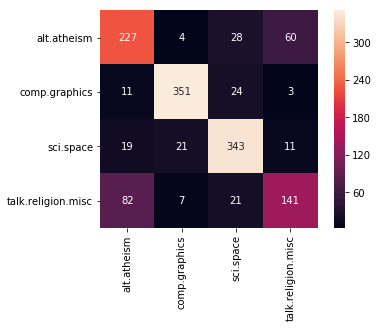

In [39]:
sns.heatmap(data=cnf_matrix1, xticklabels=categories, yticklabels=categories, square=True, annot=True, fmt='.3g')

In [40]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test, y_pred, target_names=categories)
print(report1)

                    precision    recall  f1-score   support

       alt.atheism       0.67      0.71      0.69       319
     comp.graphics       0.92      0.90      0.91       389
         sci.space       0.82      0.87      0.85       394
talk.religion.misc       0.66      0.56      0.61       251

       avg / total       0.78      0.78      0.78      1353



In [41]:
# Посмотрим на ТОП 10 по важности слова в каждой категории

def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("%s: [%s]" % (category, " ".join(feature_names[top10])))

show_top10(clf1, v, categories)

alt.atheism: [like believe say atheism does just think don people god]
comp.graphics: [software images files data use file jpeg edu graphics image]
sci.space: [just shuttle time orbit data like earth launch nasa space]
talk.religion.misc: [know say christian think just bible don jesus people god]


### 2.3 [Tf-IDF](https://ru.wikipedia.org/wiki/TF-IDF)

Мешок слов не учитывает "веса" слов, он просто смотрит их вхождение в документ. Вероятно, было бы полезно взвесить каким-то обраом каждое слово в документе. Действительно, если слово встречается во всех документах, то, наверное, его вес небольшой. А если редкое слово встречается в некоторых документах, то скорее всего оно какое-то узко тематическое.

Один из способов взвесить слова - это использовать меру tf-idf, где:

**TF - term frequency** - частота слова для каждой статьи

$$\LARGE \mathrm{tf}(t,d) = \frac{n_t}{\sum_k n_k}$$

**IDF - inverse document frequency*** — обратная частота документа - уменьшает вес часто встречаемых слов

$$\LARGE \mathrm{idf}(t, D) =  \log \frac{|D|}{|\{\,d_i \in D \mid t \in d_{i}\, \}|}$$

$D$ - число документов в корпусе

$|\{\,d_i \in D \mid t \in d_{i}\, \}|$ - число документов из коллекции ${\displaystyle D}$ , в которых встречается ${\displaystyle t}$  (когда ${\displaystyle n_{t}\neq 0}$ ).

**TF-IDF**

$$\LARGE \operatorname{tf-idf}(t,d,D) = \operatorname{tf}(t,d) \times \operatorname{idf}(t, D)$$


Для него есть класс [sklearn.feature_extraction.text.TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

- Проведите кроссвалидацию на 5 фолдах для метрики `accuracy`.
- обучите на тренировочных данных, 
- нарисуйте красивую confusion матрицу, (с именами классов, а не индексами по осям)
- выведите отчет классификации для тестовой выборки (с именами классов, а не индексами)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tf_v = TfidfVectorizer(stop_words='english')
train2 = tf_v.fit_transform(train.data)
test2 = tf_v.transform(test.data)

In [44]:
len(tf_v.vocabulary_)

26576

In [45]:
clf2 = MultinomialNB(alpha=.1)
%time mean_score_clf2 = np.mean(cross_val_score(clf2, train2, y_train, cv=5, n_jobs=3, scoring='accuracy'))
print(mean_score_clf2)

Wall time: 3.39 s
0.850546545553


In [46]:
%%time
clf2 = MultinomialNB(alpha=.1)
clf2.fit(train2, train.target)

Wall time: 32 ms


In [47]:
y_pred = clf2.predict(test2)
%time cnf_matrix2 = confusion_matrix(y_test, y_pred)

Wall time: 6.01 ms


In [48]:
accuracy_score(y_test, y_pred)

0.79083518107908357

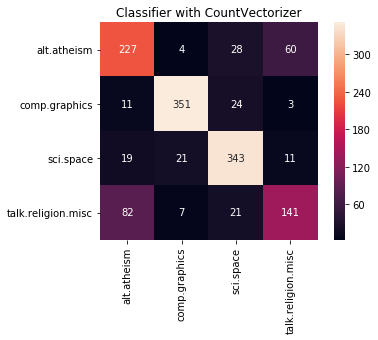

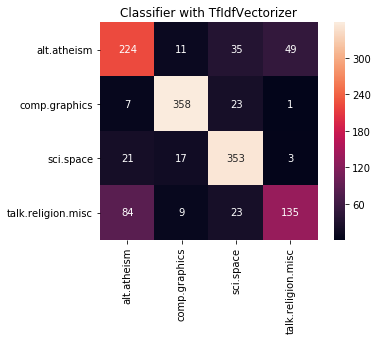

In [49]:
plt.title("Classifier with CountVectorizer")
sns.heatmap(data=cnf_matrix1, xticklabels=categories, yticklabels=categories, square=True, annot=True, fmt='.3g')
plt.show()

plt.title("Classifier with TfIdfVectorizer")
sns.heatmap(data=cnf_matrix2, xticklabels=categories, yticklabels=categories, square=True, annot=True, fmt='.3g')
plt.show()

In [50]:
print("Classifier with CountVectorizer")
print(report1)

print("###"*42 + "\n"*2)

report2 = classification_report(y_test, y_pred, target_names=categories)
print("Classifier with TfIdfVectorizer")
print(report2)

Classifier with CountVectorizer
                    precision    recall  f1-score   support

       alt.atheism       0.67      0.71      0.69       319
     comp.graphics       0.92      0.90      0.91       389
         sci.space       0.82      0.87      0.85       394
talk.religion.misc       0.66      0.56      0.61       251

       avg / total       0.78      0.78      0.78      1353

##############################################################################################################################


Classifier with TfIdfVectorizer
                    precision    recall  f1-score   support

       alt.atheism       0.67      0.70      0.68       319
     comp.graphics       0.91      0.92      0.91       389
         sci.space       0.81      0.90      0.85       394
talk.religion.misc       0.72      0.54      0.62       251

       avg / total       0.79      0.79      0.79      1353



In [51]:
print("Mean score of clf1:")
print(mean_score_clf1)
print()

print("Mean score of clf2:")
print(mean_score_clf2)

Mean score of clf1:
0.837760375691

Mean score of clf2:
0.850546545553


In [52]:
print("Top-10 words from clf1:\n")
show_top10(clf1, v, categories)

print("\n" + "###"*42)

print("\nTop-10 words from clf2:\n")
show_top10(clf2, tf_v, categories)

Top-10 words from clf1:

alt.atheism: [like believe say atheism does just think don people god]
comp.graphics: [software images files data use file jpeg edu graphics image]
sci.space: [just shuttle time orbit data like earth launch nasa space]
talk.religion.misc: [know say christian think just bible don jesus people god]

##############################################################################################################################

Top-10 words from clf2:

alt.atheism: [islam does religion atheism say just think don people god]
comp.graphics: [windows does looking program know file image files thanks graphics]
sci.space: [earth think shuttle orbit moon just launch like nasa space]
talk.religion.misc: [objective think just bible don christians christian people jesus god]


### 2.4 В чём проблема?

Как вы заметили, качество немного улучшилось. Как вы думаете почему у нас до сих пор есть ошибки? В чём проблема? Опирайтесь на вывод топа 10 важных слов, confusion matrix и репорт классификации.

**Задание**: Напишите развернутое рассуждение.

Ответ: возможно, ошибки еще остались в том числе, т.к. мы не учитываем в каком контексте находится то или иное слово, не отсеяли некоторые символы, такие как знаки препинания, цифры. К примеру, тексты категорий alt.atheism и talk.religion.misc имеется большое пересечение множеств топ-10 слов(например, think, just, don, god, say, people).

![](https://i.imgur.com/3D5pgrk.png)

Можно еще немного улучшить качество предсказания, если использовть n-граммы, то есть не только одиночные слова, но и пары, тройки. Для этого у векторайзера есть параметр `ngram_range`, но будьте осторожны, сгенерируется очень много признаков. Их количество можно ограничить  `max_features`. Ещё можно копать в сторону правильного процессинга текстов: лемматизация и стемминг, чтобы убирать окончания, но это обчно не сильно помогает в английском языке.

Кроме того можно было бы пойти совсем в другую сторону и использовать word-2-vec технологии, тогда бы у нас слова начал "обретать" смысл. Но это вовсем другая история.